In [609]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, RocCurveDisplay
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler 
from sklearn.compose import make_column_transformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn import set_config
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, RocCurveDisplay
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
set_config(display='diagram')
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Dense, LSTM
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score,RandomizedSearchCV,GridSearchCV
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score,f1_score,roc_auc_score,roc_curve
from math import sqrt

# Predecir la perdida o cancelacion de Tarjeta de Credito por parte de un cliente.



A manager at the bank is disturbed with more and more customers leaving their credit card services. They would really appreciate if one could predict for them who is gonna get churned so they can proactively go to the customer to provide them better services and turn customers' decisions in the opposite direction

I have been using this for a while to get datasets and accordingly work on them to produce fruitful results. The site explains how to solve a particular business problem.

Now, this dataset consists of 10,000 customers mentioning their age, salary, marital_status, credit card limit, credit card category, etc. There are nearly 18 features.

We have only 16.07% of customers who have churned. Thus, it's a bit difficult to train our model to predict churning customers.



### Traducido:

Un gerente del banco está molesto porque cada vez más clientes abandonan sus servicios de tarjeta de crédito. Realmente apreciarían si se pudiera predecir quién va a ser expulsado para que puedan acudir de manera proactiva al cliente para brindarle mejores servicios y cambiar las decisiones de los clientes en la dirección opuesta. 

Debemos buscar un modelo para resolver este problema comercial en particular.

Ahora, este conjunto de datos consta de 10,000 clientes que mencionan su edad, salario, estado civil, límite de tarjeta de crédito, categoría de tarjeta de crédito, etc. Hay casi 18 características.

Solo tenemos un 16,07% de clientes que se han marchado. Por lo tanto, es un poco difícil entrenar nuestro modelo para predecir la rotación de clientes.


### Diccionario 

#### Revolving Balance 

¿Qué es un balance rotativo? ¿BALANCE? Con el crédito renovable, un consumidor tiene una línea de crédito que puede seguir usando y pagando una y otra vez. El saldo que se transfiere de un mes al siguiente es el saldo renovable de ese préstamo.




In [610]:
df = pd.read_csv('BankChurners.csv')
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [611]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [612]:
df.drop(df.columns[[16,19,21,22,]], axis=1, inplace=True)

In [613]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [614]:
df['Card_Category'].value_counts()

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64

In [615]:
df['Attrition_Flag'].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

In [616]:
df['Attrition_Flag'].value_counts().sum()

10127

In [617]:
df['Attrition_Flag'].value_counts()/df['Attrition_Flag'].value_counts().sum()

Existing Customer    0.83934
Attrited Customer    0.16066
Name: Attrition_Flag, dtype: float64

In [618]:
df.groupby(['Attrition_Flag']).mean().round(1)

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
Attrition_Flag,,,,,,,,,,,,,
Attrited Customer,735261381.3,46.7,2.4,36.2,3.3,2.7,3.0,8136.0,672.8,7463.2,3095.0,44.9,0.2
Existing Customer,739927217.9,46.3,2.3,35.9,3.9,2.3,2.4,8726.9,1256.6,7470.3,4654.7,68.7,0.3


In [619]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,4404.086304,64.858695,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,3397.129254,23.472570,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,510.000000,10.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,2155.500000,45.000000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,3899.000000,67.000000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,4741.000000,81.000000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,18484.000000,139.000000,0.999000


In [620]:
df.groupby(['Attrition_Flag']).describe().round(1)

CLIENTNUM                                        \
                      count         mean         std          min   
Attrition_Flag                                                      
Attrited Customer    1627.0  735261381.3  35577253.4  708083283.0   
Existing Customer    8500.0  739927217.9  37107226.5  708082083.0   

                                                                       \
                           25%          50%          75%          max   
Attrition_Flag                                                          
Attrited Customer  712371258.0  716564433.0  768373683.0  828294933.0   
Existing Customer  713219658.0  718164333.0  778341539.2  828343083.0   

                  Customer_Age        ... Total_Trans_Ct         \
                         count  mean  ...            75%    max   
Attrition_Flag                        ...                         
Attrited Customer       1627.0  46.7  ...           51.0   94.0   
Existing Customer       8500.0  46.3  ...           82.0  139.0   

                  Avg_Utilization_Ratio                                     
                                  count mean  std  min  25%  50%  75%  max  
Attrition_Flag                                                              
Attrited Customer                1627.0  0.2  0.3  0.0  0.0  0.0  0.2  1.0  
Existing Customer                8500.0  0.3  0.3  0.0  0.1  0.2  0.5  1.0  

[2 rows x 104 columns]

In [621]:
df.nunique()

CLIENTNUM                   10127
Attrition_Flag                  2
Customer_Age                   45
Gender                          2
Dependent_count                 6
Education_Level                 7
Marital_Status                  4
Income_Category                 6
Card_Category                   4
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Trans_Amt              5033
Total_Trans_Ct                126
Avg_Utilization_Ratio         964
dtype: int64

In [622]:
df['Total_Trans_Ct'].unique()

array([ 42,  33,  20,  28,  24,  31,  36,  32,  26,  17,  29,  27,  21,
        30,  16,  18,  23,  22,  40,  38,  25,  43,  37,  19,  35,  15,
        41,  57,  12,  14,  34,  44,  13,  47,  10,  39,  53,  50,  52,
        48,  49,  45,  11,  55,  46,  54,  60,  51,  63,  58,  59,  61,
        78,  64,  65,  62,  67,  66,  56,  69,  71,  75,  74,  76,  84,
        82,  88,  68,  70,  73,  86,  72,  79,  80,  85,  81,  87,  83,
        91,  89,  77, 103,  93,  96,  99,  92,  90,  94,  95,  98, 100,
       102,  97, 101, 104, 105, 106, 107, 109, 118, 108, 122, 113, 112,
       111, 127, 114, 124, 110, 120, 125, 121, 117, 126, 134, 116, 119,
       129, 131, 115, 128, 139, 123, 130, 138, 132])

In [623]:
df['Total_Relationship_Count'].unique()

array([5, 6, 4, 3, 2, 1])

In [624]:
df['Months_Inactive_12_mon'].unique()

array([1, 4, 2, 3, 6, 0, 5])

In [625]:
df['Months_Inactive_12_mon'].unique()

array([1, 4, 2, 3, 6, 0, 5])

In [626]:
df[df.Attrition_Flag == 'Attrited Customer'].Months_Inactive_12_mon.mean()

2.693300553165335

In [627]:
df[df.Attrition_Flag == 0 ].Total_Trans_Ct.mean()

nan

In [628]:
df[df.Attrition_Flag == 1 ].Total_Trans_Ct.mean()

nan

In [629]:
df['Months_on_book'].unique()

array([39, 44, 36, 34, 21, 46, 27, 31, 54, 30, 48, 37, 56, 42, 49, 33, 28,
       38, 41, 43, 45, 52, 40, 50, 35, 47, 32, 20, 29, 25, 53, 24, 55, 23,
       22, 26, 13, 51, 19, 15, 17, 18, 16, 14])

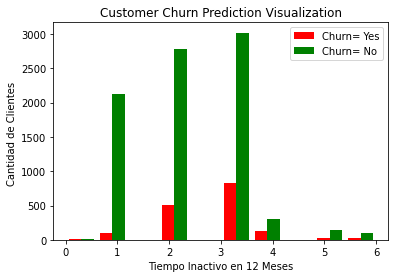

In [630]:
tiempo_churn_no = df[df.Attrition_Flag == 'Existing Customer'].Months_Inactive_12_mon
tiempo_churn_yes = df[df.Attrition_Flag =='Attrited Customer'].Months_Inactive_12_mon

plt.xlabel('Tiempo Inactivo en 12 Meses')
plt.ylabel('Cantidad de Clientes ')
plt.title('Customer Churn Prediction Visualization')

plt.hist([tiempo_churn_yes,tiempo_churn_no],color =['red','green'], label=['Churn= Yes','Churn= No'])
plt.legend()

Text(0.5, 1.0, 'Meses de contacto y los que salieron o no')

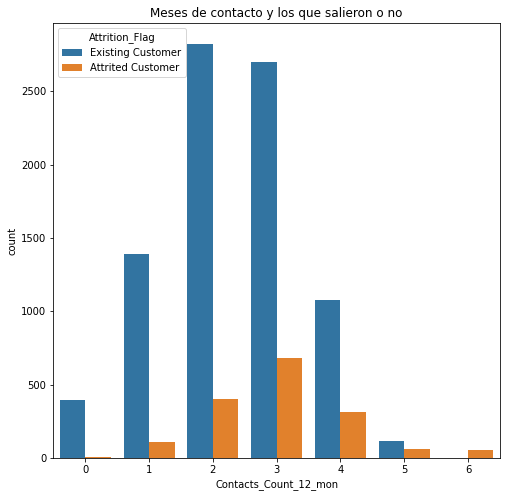

In [631]:
plt.figure(figsize=(8, 8))
sns.countplot(x='Contacts_Count_12_mon', hue='Attrition_Flag' , data=df)
plt.title('Meses de contacto y los que salieron o no')

<AxesSubplot:xlabel='Months_Inactive_12_mon', ylabel='Total_Trans_Ct'>

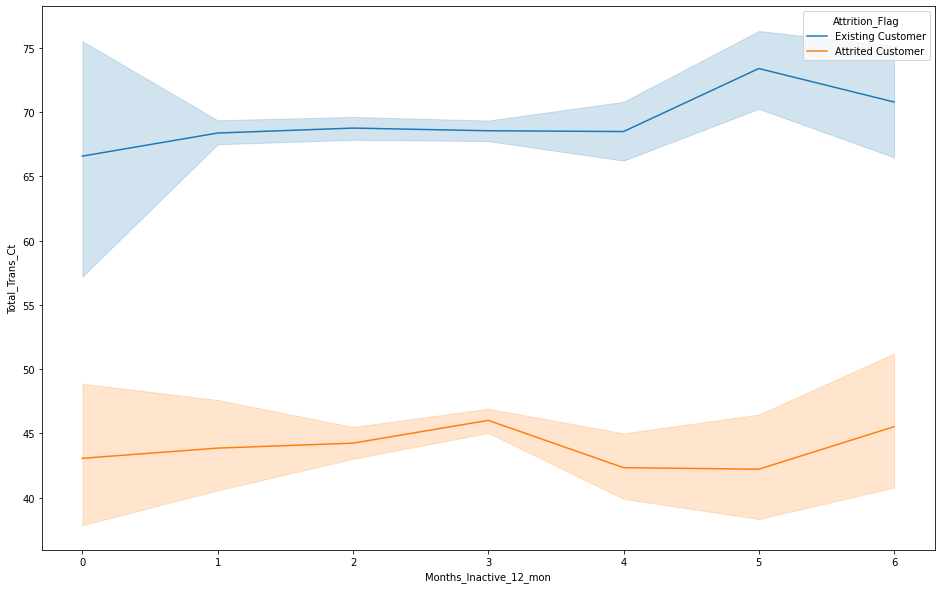

In [632]:
plt.figure(figsize = (16,10))
sns.lineplot(x ='Months_Inactive_12_mon', y = 'Total_Trans_Ct', hue = 'Attrition_Flag', data = df)

Text(0.5, 1.0, 'Tipo de Tarjeta con el Churn')

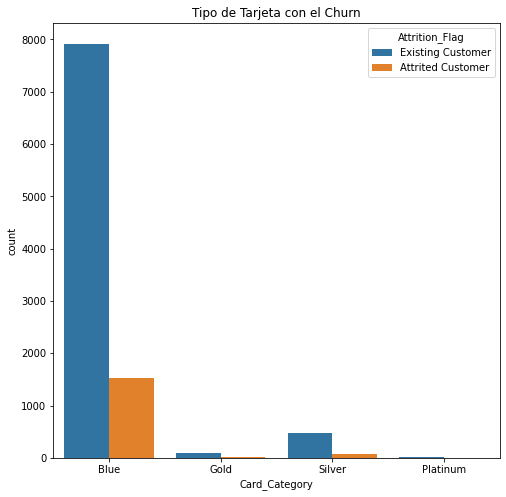

In [633]:
plt.figure(figsize=(8, 8))
sns.countplot(x='Card_Category', hue='Attrition_Flag' , data=df)
plt.title('Tipo de Tarjeta con el Churn')

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Credit_Limit'>

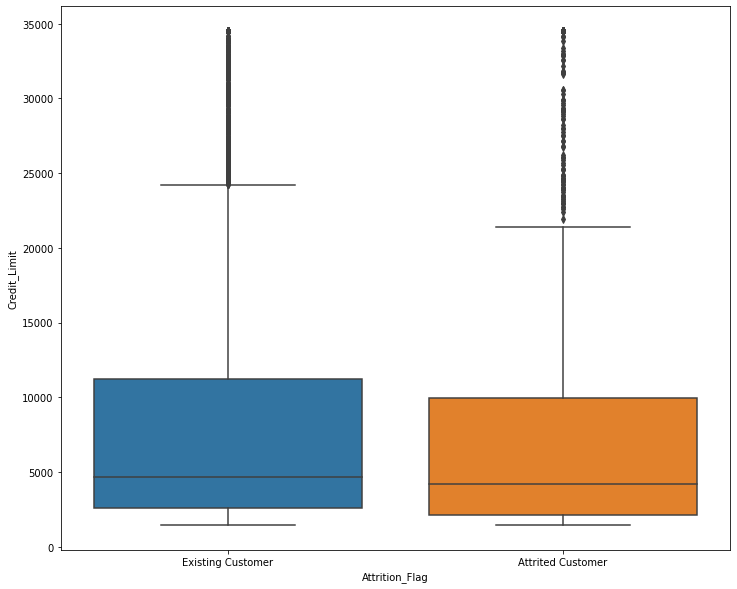

In [634]:
plt.figure(figsize=(12, 10))
sns.boxplot(y = 'Credit_Limit', x = 'Attrition_Flag', data = df)

Text(0.5, 1.0, 'Tipo de Tarjeta con el Churn')

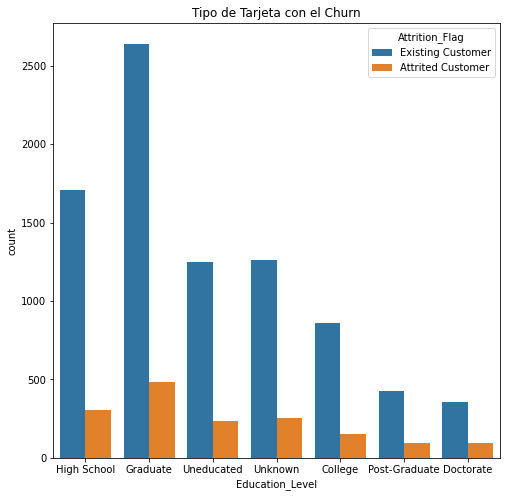

In [635]:
plt.figure(figsize=(8, 8))
sns.countplot(x='Education_Level', hue='Attrition_Flag' , data=df)
plt.title('Tipo de Tarjeta con el Churn')

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Avg_Open_To_Buy'>

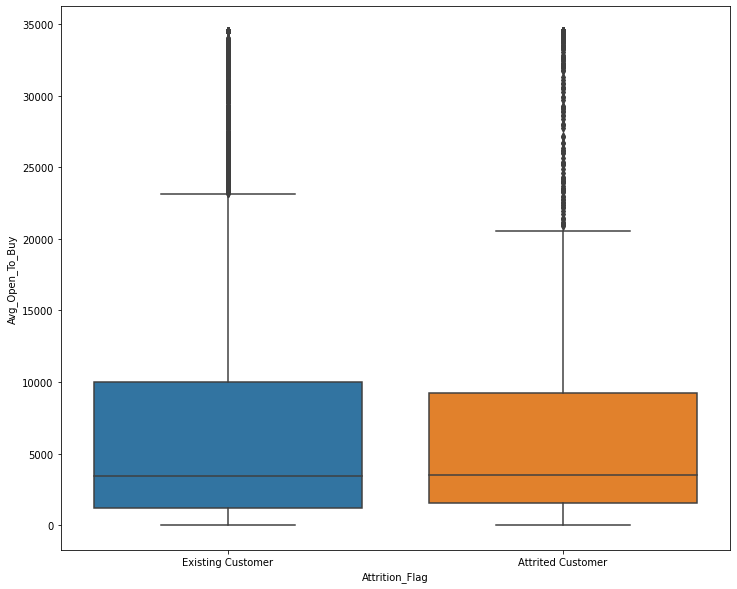

In [636]:
plt.figure(figsize=(12, 10))
sns.boxplot(y = 'Avg_Open_To_Buy', x = 'Attrition_Flag', data = df)

Text(0.5, 1.0, 'Tipo de Tarjeta con el Churn')

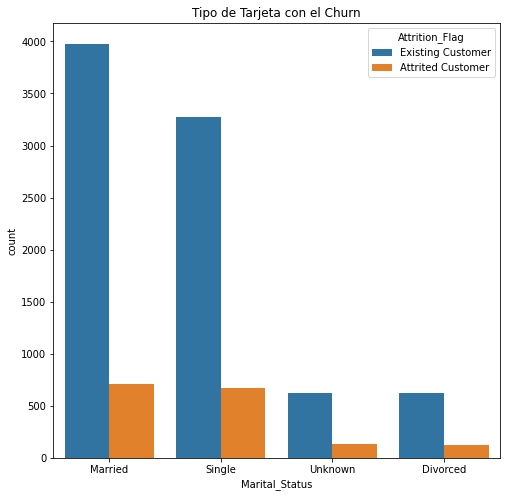

In [637]:
plt.figure(figsize=(8, 8))
sns.countplot(x='Marital_Status', hue='Attrition_Flag' , data=df)
plt.title('Tipo de Tarjeta con el Churn')

Text(0.5, 1.0, 'Genero con el Churn')

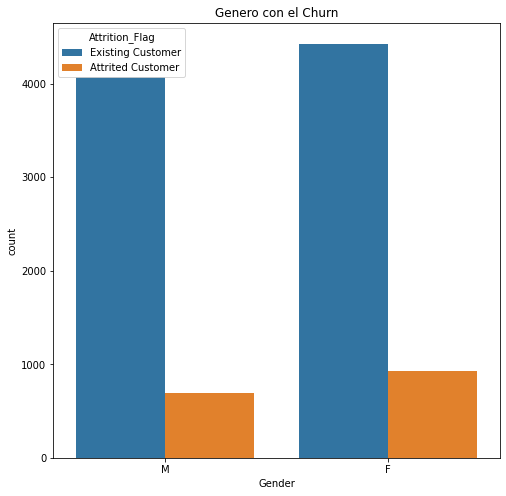

In [638]:
plt.figure(figsize=(8, 8))
sns.countplot(x='Gender', hue='Attrition_Flag' , data=df)
plt.title('Genero con el Churn')

<AxesSubplot:xlabel='Avg_Open_To_Buy', ylabel='Density'>

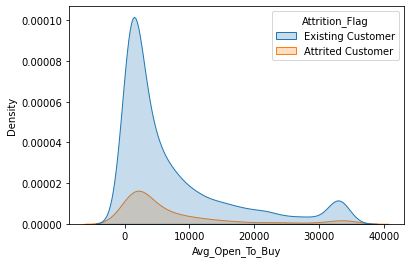

In [643]:
sns.kdeplot(x = 'Avg_Open_To_Buy',hue = 'Attrition_Flag', shade = True, data= df,)

In [644]:
df['Attrition_Flag'].replace({'Existing Customer':0,'Attrited Customer':1}, inplace=True)
df['Attrition_Flag'].value_counts()

0    8500
1    1627
Name: Attrition_Flag, dtype: int64

<AxesSubplot:>

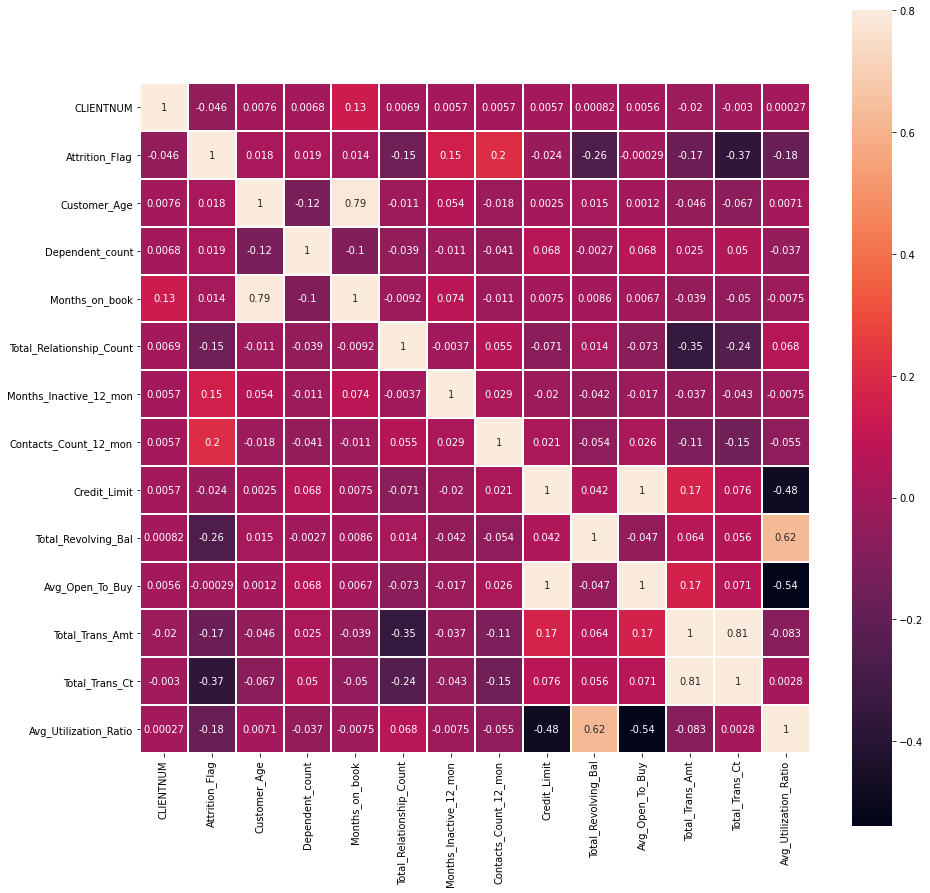

In [645]:
corr = df.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True)

<AxesSubplot:>

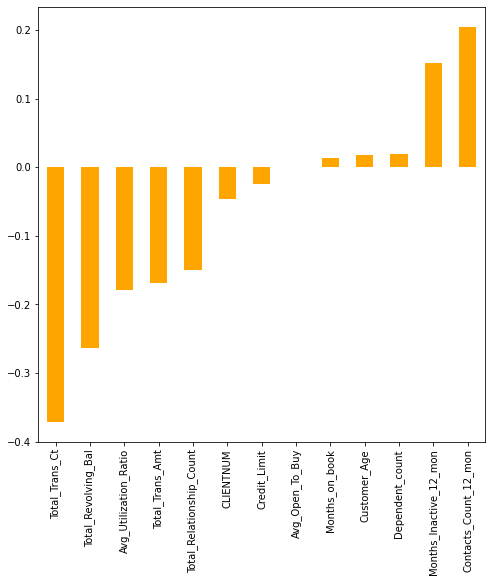

In [646]:
df.corr()['Attrition_Flag'].drop('Attrition_Flag').sort_values().plot(kind='bar',figsize=(8, 8), color='orange')

In [647]:
df_numerical=df.select_dtypes(exclude='object')
df_numerical.head(3)

,CLIENTNUM,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
0,768805383,0,45,3,39,5,1,3,12691.0,777,11914.0,1144,42,0.061
1,818770008,0,49,5,44,6,1,2,8256.0,864,7392.0,1291,33,0.105
2,713982108,0,51,3,36,4,1,0,3418.0,0,3418.0,1887,20,0.000


Text(0.5, 1.0, 'Ingresos con relacion al churn')

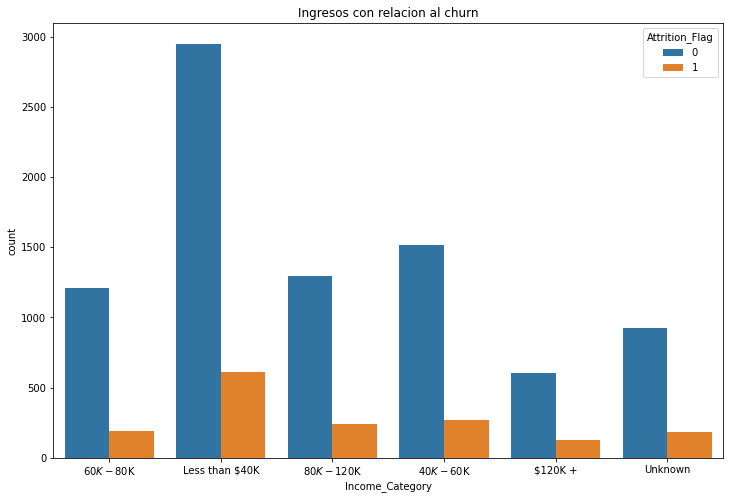

In [648]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Income_Category', hue='Attrition_Flag' , data=df)
plt.title('Ingresos con relacion al churn')

<AxesSubplot:xlabel='Income_Category', ylabel='Avg_Open_To_Buy'>

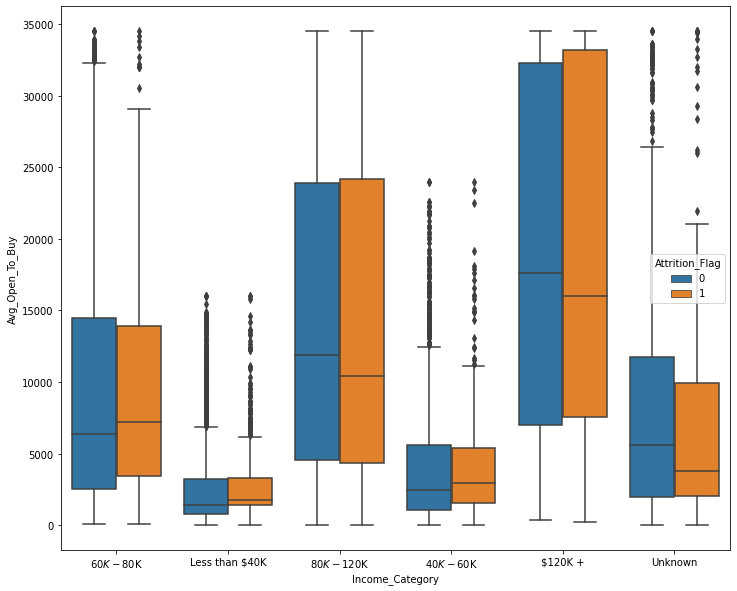

In [649]:
plt.figure(figsize=(12, 10))
sns.boxplot(y = 'Avg_Open_To_Buy', x = 'Income_Category', hue = 'Attrition_Flag', data = df)

<AxesSubplot:xlabel='Income_Category', ylabel='Credit_Limit'>

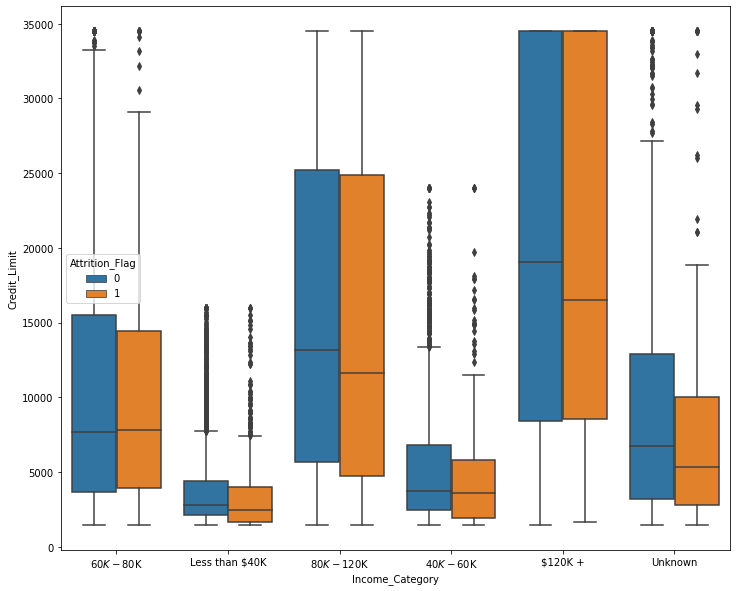

In [650]:
plt.figure(figsize=(12, 10))
sns.boxplot(y = 'Credit_Limit', x = 'Income_Category', hue = 'Attrition_Flag', data = df)

<AxesSubplot:xlabel='Months_Inactive_12_mon', ylabel='Customer_Age'>

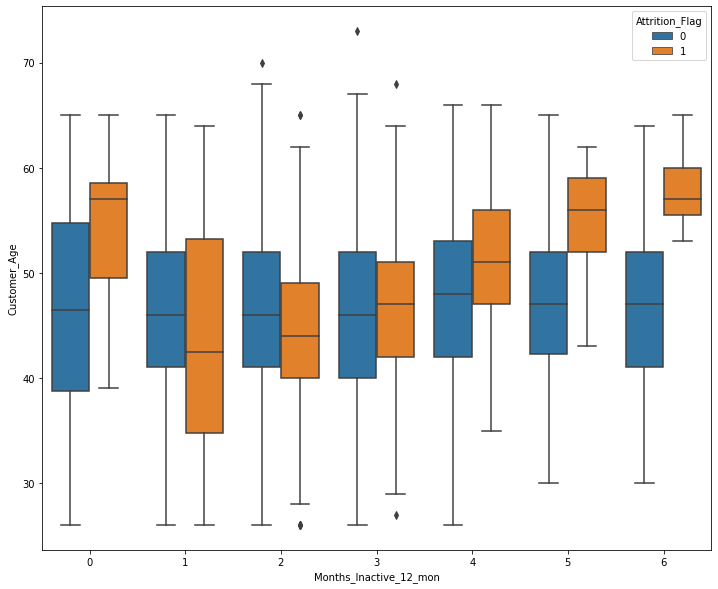

In [651]:
plt.figure(figsize=(12, 10))
sns.boxplot(y = 'Customer_Age', x = 'Months_Inactive_12_mon', hue = 'Attrition_Flag', data = df)

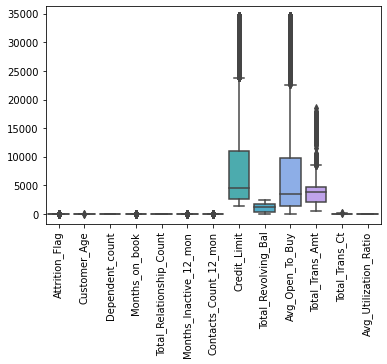

In [652]:
sns.boxplot(data=df.drop(columns=['CLIENTNUM']))
plt.xticks(rotation=90,fontsize=10,horizontalalignment='center')
plt.show()

<AxesSubplot:xlabel='Months_Inactive_12_mon'>

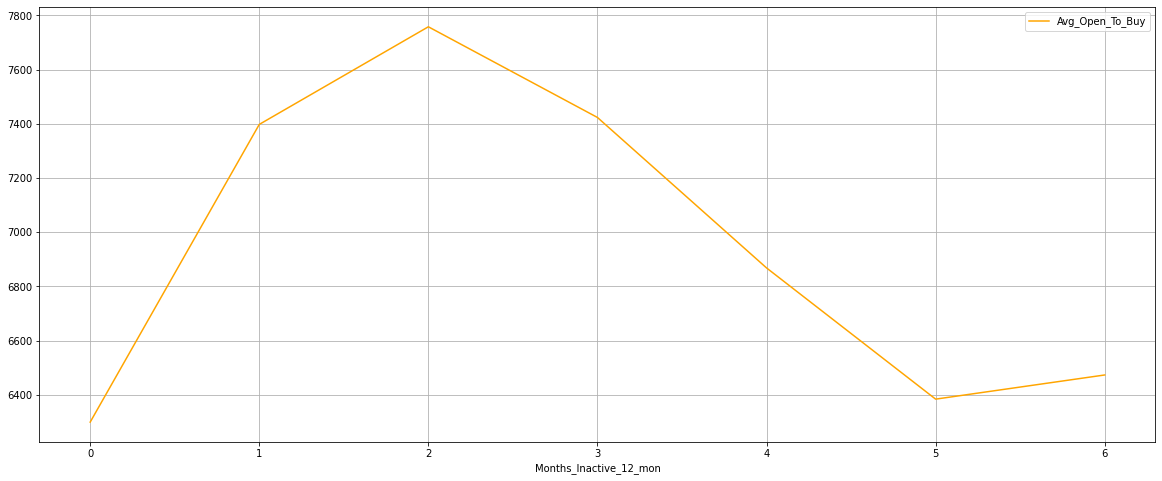

In [653]:
date = df.groupby(["Months_Inactive_12_mon"])[['Avg_Open_To_Buy']].mean()
date.plot(figsize=(20,8),grid = True, color = 'orange')

<AxesSubplot:xlabel='Months_Inactive_12_mon'>

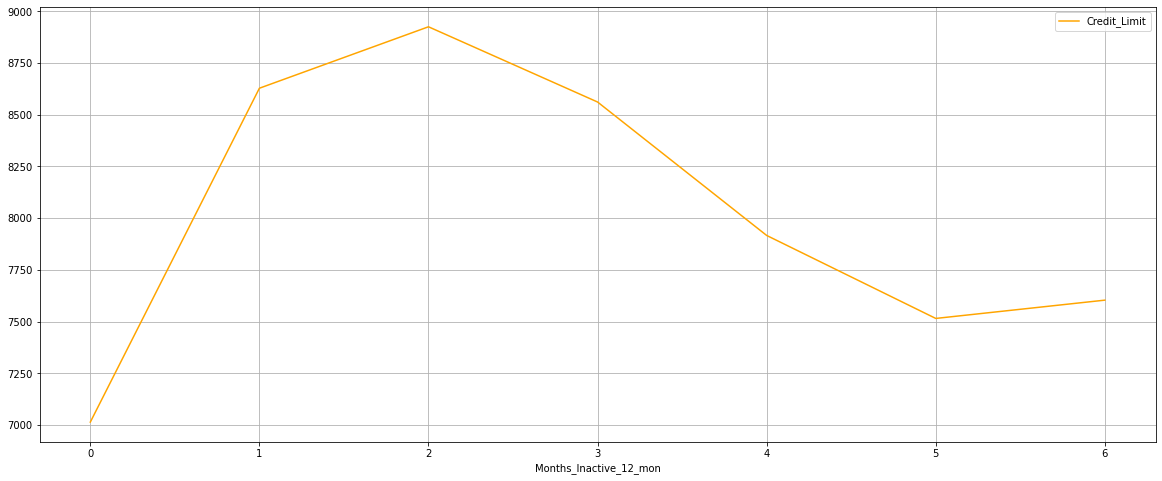

In [654]:
date = df.groupby(["Months_Inactive_12_mon"])[['Credit_Limit']].mean()
date.plot(figsize=(20,8),grid = True, color = 'orange')

<AxesSubplot:xlabel='Total_Trans_Ct'>

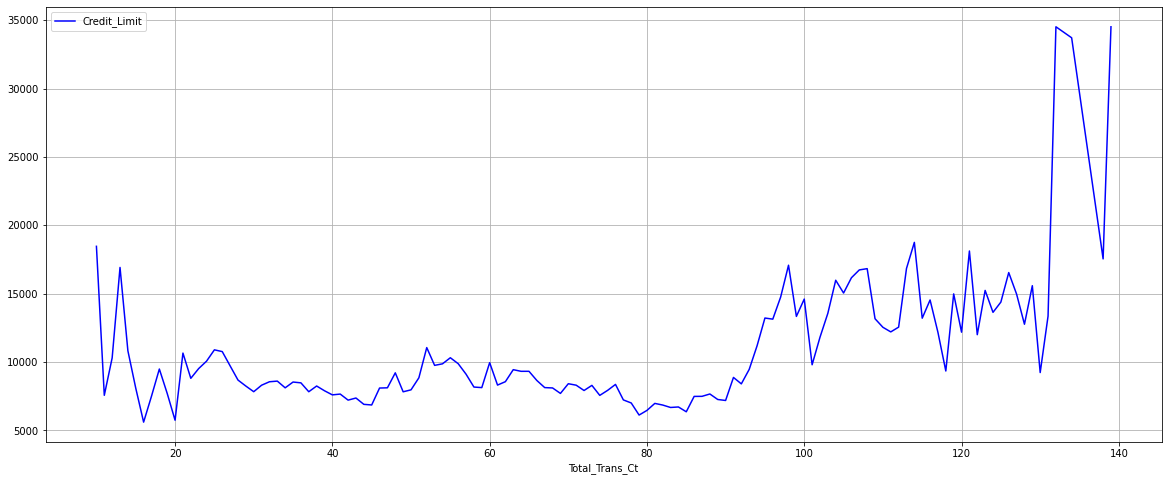

In [655]:
date = df.groupby(["Total_Trans_Ct"])[['Credit_Limit']].mean()
date.plot(figsize=(20,8),grid = True, color = 'blue')

Text(0.5, 1.0, 'Cantidad de Personas que han saldio con el Ingreso Promedio')

<Figure size 1080x1080 with 0 Axes>

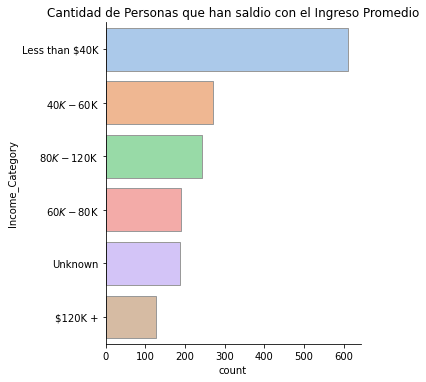

In [656]:
plt.figure(figsize=(15,15))
sns.catplot(data=df[df['Attrition_Flag'] == 1], y ='Income_Category', kind="count",palette="pastel", edgecolor = ".6",order = df.Income_Category.value_counts().index)
plt.title('Cantidad de Personas que han saldio con el Ingreso Promedio')

# Ingenieria de Variables

# Modelo 

In [657]:
# Dividir
X = df.drop(columns=['Attrition_Flag','CLIENTNUM'])
y = df['Attrition_Flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [658]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_Age              10127 non-null  int64  
 1   Gender                    10127 non-null  object 
 2   Dependent_count           10127 non-null  int64  
 3   Education_Level           10127 non-null  object 
 4   Marital_Status            10127 non-null  object 
 5   Income_Category           10127 non-null  object 
 6   Card_Category             10127 non-null  object 
 7   Months_on_book            10127 non-null  int64  
 8   Total_Relationship_Count  10127 non-null  int64  
 9   Months_Inactive_12_mon    10127 non-null  int64  
 10  Contacts_Count_12_mon     10127 non-null  int64  
 11  Credit_Limit              10127 non-null  float64
 12  Total_Revolving_Bal       10127 non-null  int64  
 13  Avg_Open_To_Buy           10127 non-null  float64
 14  Total_

In [659]:
X

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1144,42,0.061
1,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1291,33,0.105
2,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,1887,20,0.000
3,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1171,20,0.760
4,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,816,28,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,15476,117,0.462
10123,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,8764,69,0.511
10124,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,10291,60,0.000
10125,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,8395,62,0.000


In [660]:
y

0        0
1        0
2        0
3        0
4        0
        ..
10122    0
10123    1
10124    1
10125    1
10126    1
Name: Attrition_Flag, Length: 10127, dtype: int64

In [661]:
### Selectors
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

In [662]:
# Scaler
scaler = StandardScaler()
median_imputer = SimpleImputer(strategy='median')
# One-hot encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [663]:
# Numeric pipeline
numeric_pipe = make_pipeline(scaler)
numeric_pipe

Pipeline(steps=[('standardscaler', StandardScaler())])

In [664]:
# Categorical pipeline
categorical_pipe = make_pipeline(ohe)
categorical_pipe

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [665]:
# Tuples para Column Transformer
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)
# ColumnTransformer
preprocessor = make_column_transformer(number_tuple, category_tuple)
preprocessor


ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fadfb8c8820>),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fae204e2100>)])

In [666]:
# fit on train
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fadfb8c8820>),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fae204e2100>)])

In [667]:
# transform train and test
X_train = preprocessor.transform(X_train)
X_test = preprocessor.transform(X_test)

In [668]:
# Comprueben los valores faltantes y que los datos se escalen y tengan una codificación one-hot

print(np.isnan(X_train).sum().sum(), 'missing values in training data')
print(np.isnan(X_test).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train.dtype)
print('All data in X_test_processed are', X_test.dtype)
print('\n')
print('shape of data is', X_train.shape)
print('\n')
X_train

0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (7595, 35)




array([[-0.03615673,  1.29619992,  0.01143375, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.08843963, -0.25940384, -0.23774661, ...,  0.        ,
         0.        ,  0.        ],
       [-0.40994584,  2.07400179,  0.26061411, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.53454221,  1.29619992, -0.48692696, ...,  0.        ,
         0.        ,  0.        ],
       [-0.78373495,  0.51839804, -0.98528768, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.83601785,  1.29619992,  1.63110608, ...,  0.        ,
         0.        ,  0.        ]])

# Machine Learning 

In [669]:
def cross_val(model):
    accuracies=cross_val_score(estimator = model, X = X_train, y = y_train, cv =10)
    return accuracies.mean()*100

def fit_evaluate(model):
    name=model.__class__.__name__
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    cross=cross_val(model)
    a_s=accuracy_score(y_test,y_pred)*100
    pre_sc=precision_score(y_test,y_pred)*100
    rec_sc=recall_score(y_test,y_pred)*100
    f1_sc=f1_score(y_test,y_pred)*100
    roc_sc=roc_auc_score(y_test,y_pred)*100
    result=pd.DataFrame([[name,cross,a_s,pre_sc,rec_sc,f1_sc,roc_sc]],columns=['model','accuracy_train','accuracy_test','precision_score','recall_score','f1_score','roc_auc_score'])
    return result

In [670]:
models=[LogisticRegression(),XGBClassifier(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier()]
result_models=pd.DataFrame(columns=['model','accuracy_train','accuracy_test','precision_score','recall_score','f1_score','roc_auc_score'])
for model in models:
    results = fit_evaluate(model)
    result_models= pd.concat([result_models,results])
result_models.sort_values(by='recall_score',ascending=False)

,model,accuracy_train,accuracy_test,precision_score,recall_score,f1_score,roc_auc_score
0,XGBClassifier,95.958082,95.260664,89.445910,80.906921,84.962406,89.506939
0,DecisionTreeClassifier,92.811490,91.666667,74.761905,74.940334,74.851013,84.961885
0,RandomForestClassifier,94.378181,93.838863,91.482650,69.212411,78.804348,83.967303
0,LogisticRegression,89.980202,88.823065,73.776224,50.357995,59.858156,73.404270
0,KNeighborsClassifier,90.032938,89.020537,75.824176,49.403341,59.826590,73.139910


<AxesSubplot:xlabel='model', ylabel='accuracy_train'>

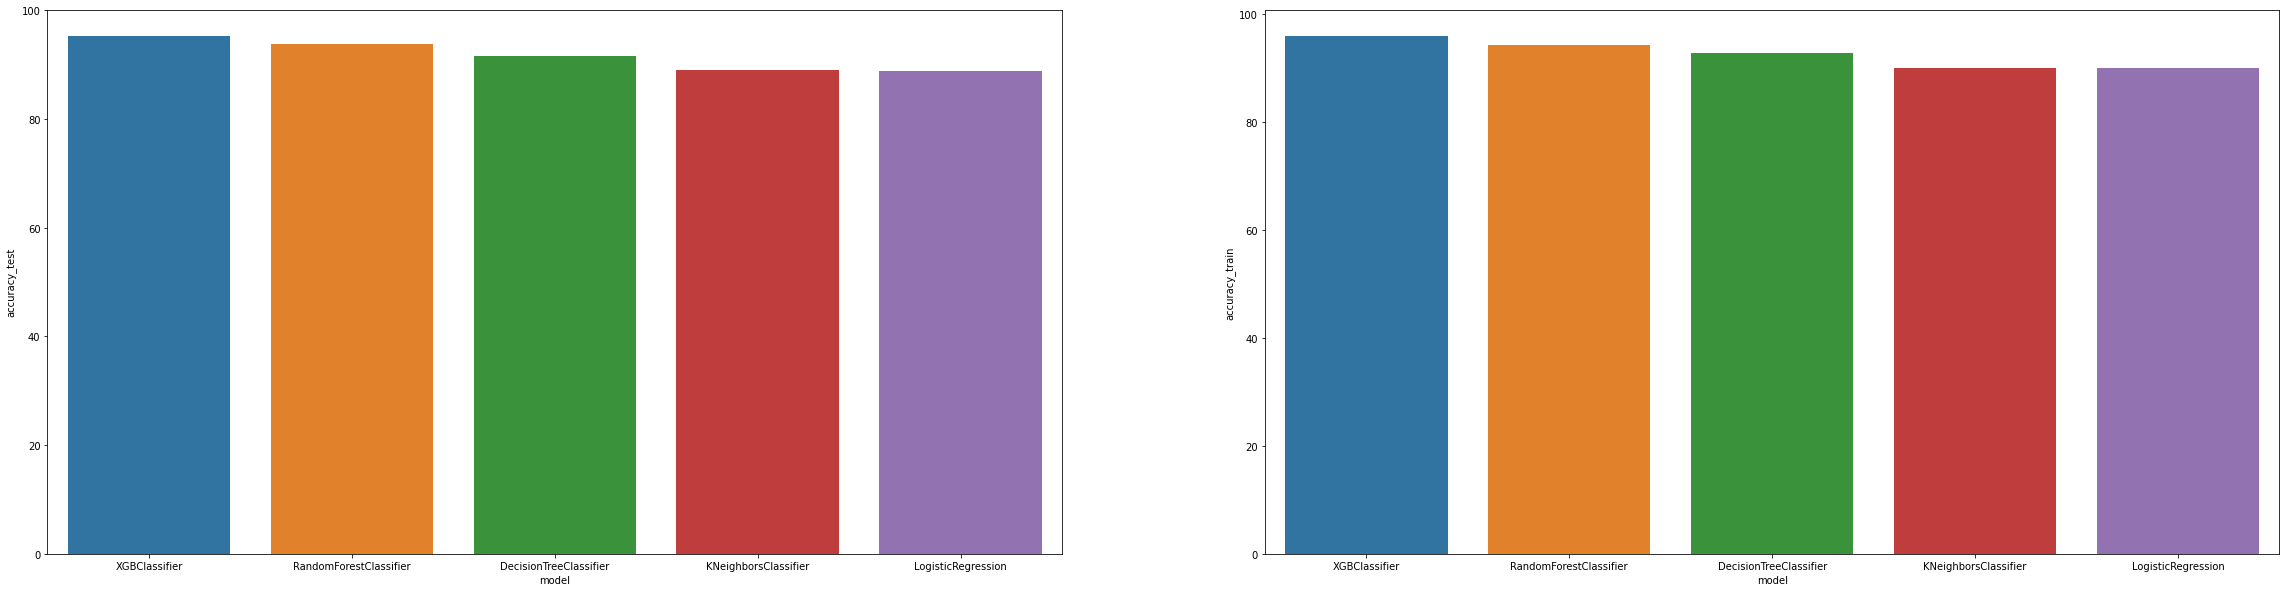

In [671]:
plt.subplots(figsize=(40,10))
plt.subplot(1,2,1)
sns.barplot(y='accuracy_test',x='model',data=result_models.sort_values(by='accuracy_test',ascending=False))
plt.subplot(1,2,2)
sns.barplot(y='accuracy_train',x='model',data=result_models.sort_values(by='accuracy_test',ascending=False))

In [672]:
model=RandomForestClassifier()
model.fit(X_train,y_train)
pred=model.predict(X_test)
acc=accuracy_score(y_test,pred)*100
print(acc)

93.44391785150079


In [673]:
model.feature_importances_

array([0.04123498, 0.01934795, 0.03433079, 0.06702489, 0.03426034,
       0.03668192, 0.04752146, 0.1057285 , 0.04763217, 0.19354123,
       0.20016161, 0.07296004, 0.00838032, 0.00908222, 0.00383678,
       0.00349329, 0.00604201, 0.00558019, 0.00323825, 0.00474826,
       0.00455582, 0.00316766, 0.00811158, 0.00695774, 0.00293195,
       0.00237244, 0.00452123, 0.00394218, 0.00442898, 0.00519092,
       0.00389514, 0.00200508, 0.00076645, 0.00044114, 0.00188447])

In [674]:
model.feature_importances_.max()

0.20016161072525718

In [675]:
model.feature_importances_.min()

0.0004411362725826945

In [676]:
X.columns

Index(['Customer_Age', 'Gender', 'Dependent_count', 'Education_Level',
       'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Trans_Amt', 'Total_Trans_Ct',
       'Avg_Utilization_Ratio'],
      dtype='object')

In [677]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,-0.036157,1.296200,0.011434,0.765516,-0.339729,-1.311752,-0.690795,0.210621,-0.710069,-0.051462,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,0.088440,-0.259404,-0.237747,-0.520503,-0.339729,1.406352,-0.484076,0.493552,-0.528606,-0.744701,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-0.409946,2.074002,0.260614,-1.163513,0.646603,2.312387,-0.793956,-1.427920,-0.666352,-0.596234,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-0.659139,-0.259404,-0.985288,-1.806522,-0.339729,0.500317,0.555584,1.360798,0.433866,3.142057,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-0.285349,1.296200,0.011434,-1.806522,0.646603,-1.311752,1.850914,0.451727,1.811442,2.610144,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7590,-0.285349,-1.037206,0.260614,-0.520503,-0.339729,2.312387,-0.495872,1.668332,-0.645757,-0.679527,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7591,0.836018,0.518398,0.011434,0.122506,0.646603,3.218422,-0.077252,-1.427920,0.050753,-0.631305,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
7592,-0.534542,1.296200,-0.486927,-0.520503,-1.326061,-0.405718,-0.697410,0.475100,-0.740405,0.072748,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
7593,-0.783735,0.518398,-0.985288,0.122506,-1.326061,-1.311752,-0.559707,0.671922,-0.620275,-0.861313,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


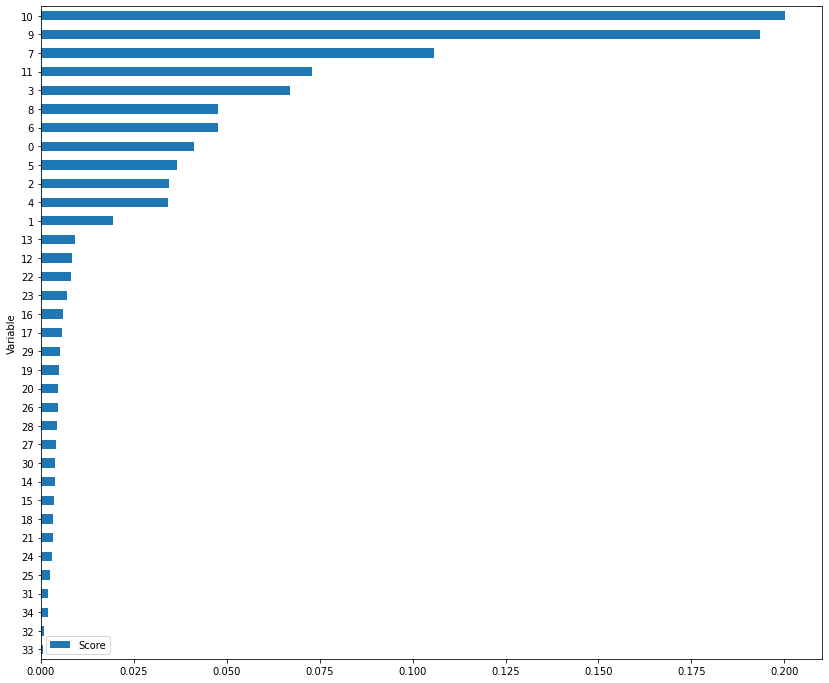

In [690]:
# vamos a hacer un grafico, con esa informacion, puedes estudiarlo
importancia = pd.DataFrame()
importancia['Variable'] = pd.DataFrame(X_test).columns
importancia['Score'] = model.feature_importances_
importancia.sort_values(by = 'Score', ascending=True).plot(x='Variable',
                                                           y='Score',
                                                           kind='barh',
                                                           figsize=(14,12))
plt.show()

In [679]:
etiq = dict(zip(X.columns, model.feature_importances_))

orden = sorted(etiq.items(), key=lambda X: X[1], reverse=True)

pd.DataFrame(orden, columns=['Etiqueta', 'Importancia'])

,Etiqueta,Importancia
0,Contacts_Count_12_mon,0.200162
1,Months_Inactive_12_mon,0.193541
2,Months_on_book,0.105728
3,Credit_Limit,0.072960
4,Education_Level,0.067025
5,Total_Relationship_Count,0.047632
6,Card_Category,0.047521
7,Customer_Age,0.041235
8,Income_Category,0.036682
9,Dependent_count,0.034331


In [680]:
xgb = XGBClassifier( )
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [681]:
print('Training accuracy:', xgb.score(X_train, y_train))
print('Testing accuracy:', xgb.score(X_test, y_test))

Training accuracy: 1.0
Testing accuracy: 0.95260663507109


In [682]:
xgb = xgb.predict(X_test)

In [683]:
print(classification_report(y_test,xgb))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      2113
           1       0.89      0.81      0.85       419

    accuracy                           0.95      2532
   macro avg       0.93      0.90      0.91      2532
weighted avg       0.95      0.95      0.95      2532



<Figure size 432x288 with 0 Axes>

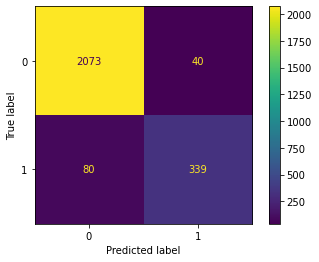

In [684]:
cm = confusion_matrix(y_test,xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
plt.figure()
disp.plot()
plt.show()

In [691]:
round((2073+339)/(2074+339+40+80),2)

0.95

In [693]:
339/(2074+339+40+80)

0.13383339913146466

In [686]:
df.sample(1)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
6641,779885358,0,51,M,0,College,Married,$120K +,Silver,35,5,1,2,34516.0,2332,32184.0,4587,82,0.068


In [700]:
df['Attrition_Flag'].value_counts()

0    8500
1    1627
Name: Attrition_Flag, dtype: int64

In [701]:
pd.DataFrame(xgb).value_counts()

0    2153
1     379
dtype: int64

# Salvar el Modelo

In [688]:
import pickle

In [689]:
#variable para salvar el modelo
model_bank = 'model.sav'
pickle.dump(xgb,open(model_bank,'wb'))